# Orientation to Python

Chem 6004
January 28, 2022

This will introduce some of the basic concepts required for scientific computing in python.
In particular, the following concepts will be illustrated:


- Basic use of numpy 
- Basic use of matplotlib
- Arrays
- Loops
- Timing
- Functions

We will start with the illustrative example discussed in class, namely, the kinetic energy 
and potential energy of a collection or $N$ charged particle.

\begin{equation}
T = \sum_{i=1}^N \frac{1}{2} m_i v_i^2.
\end{equation}


A natural way to store the masses and velocities of the particles is in an array.  The following lines of code 
will import numpy and create two numpy arrays that can be used to store the masses and velocities of $N=10$ particles

In [1]:
import numpy as np
import time

### Number of particles will be 10
Npart = 10

print(Npart)

''' create an array 'm' and 'v' to store the masses and velocities of the 10 particles... 
    initially, each entry in 'm' and 'v' will be zero, and we will have to assign values later '''

m = np.zeros(Npart)
v = np.zeros(Npart)

print(m)
print(v)



10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We can use a for loop to access all the entries in 'm' and 'v' and assign them values.  For simplicity,
we will give each particle the same mass (1.0 in natural units of mass) and the same velocity (2.5 in natural
units of velocity).

In [2]:
''' use for-loop to fill values of m and v here! '''
for i in range(0,Npart):
    m[i] = 1.0
    v[i] = 2.5
    
### Now that values have been assigned, print to confirm they are what you expect
print("Printing array of masses: ",m)
print("Printing array of velocities: ",v)

Printing array of masses:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Printing array of velocities:  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5]


In [3]:
# this array will store kinetic energy of each particle
T = np.zeros(Npart)
# time how long it takes to compute the kinetic energy
start = time.time()
''' compute array of kinetic energy values and also total kinetic energy here! '''
for i in range(0,Npart):
    T[i] = 1/2 * m[i] * v[i] ** 2
end = time.time()
print(end-start)
### confirm that T is indeed an array with an entry for the kinetic energy of each particle
print(T)

0.00010800361633300781
[3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125]


Finally, we can perform arithmetic operations directly with the arrays to create a new array of kinetic
energies of each particle.  The following line will compute 
\begin{equation}
T_i = \frac{1}{2} m_i v_i^2.
\end{equation}
for each particle indexed by $i$.


We can compute the total kinetic energy by summing up the entries within T.  This can be done using another
for loop, but it can also be done making use of a numpy function called 'sum'.  We will use both to confirm they give 
the same result.

In [4]:
### initialize a sum variable to zero
T_tot_loop = 0.

''' loop over elements of the T array and compute the sum '''
start_loop = time.time()
for i in range(0,Npart):
    #print(T_tot_loop)
    T_tot_loop = T_tot_loop + T[i]
end_loop = time.time()

print("Time taken by loop is",end_loop-start_loop)
''' compute the sum using np.sum and store to T_tot_sum instead '''
start_numpy = time.time()
T_tot_sum = np.sum(T)
end_numpy = time.time()
print("Time taken by numpy is ",end_numpy-start_numpy)

### print both sums to confirm both methods give the same answer
print("Result from loop is ",T_tot_loop)
print("Result from numpy sum is ",T_tot_sum)

Time taken by loop is 6.008148193359375e-05
Time taken by numpy is  0.00016689300537109375
Result from loop is  31.25
Result from numpy sum is  31.25


Reminder about dimensional quantities:
Fundamental dimensions include

- Time (SI unit is the second)
- Length (SI unit is the meter)
- Mass (SI unit is kg)
- Temperature (SI unit is K)
- Electrical Current (SI unit is amp)
- Electrical Charge (SI unit is Coulomb)

For atomic and molecular systems, a common natural unit system is called the atomic unit system.  In the atomic unit system, the following quantites have magnitude 1:

- Charge of the electron is 1 a.u. of charge
- Mass of the electron is 1 a.u. of mass
- Most probably radial value of the 1s orbital of the hydrogen atom is 1 a.u. of length (Bohr)
- $1/4\pi \epsilon_0$ is equal to 1 a.u. of permittivity

$V = \frac{q_1 q_2}{4 \pi \epsilon_0 r}$

Next let's consider the potential energy:


\begin{equation}
V_i = \sum_{j \neq i}^N \frac{q_i q_j}{r_{ij}}. 
\end{equation}
Again for simplicity, we will consider the particles to be in 1 dimension, so we can write the separation simply as
\begin{equation}
r_{ij} = \sqrt{(x_i - x_j)^2}
\end{equation}
where $x_i$ indicates the position of particle $i$ and $x_j$ the position of particle $j$.
The total potential energy will be a sum over the potential energy for each individual particle, so we can 
see we need to compute two nested sums to get the total potential energy:
\begin{equation}
V = \sum_{i=1}^N \sum_{j \neq i}^N \frac{q_i q_j}{ r_{ij}}. 
\end{equation}

We can see we need a few more quantities to compute this sum: we will need the charge for each particle,
and we will need the separation between each particle pair, which of course means we need the positions
of all the particles.  We can store the charges and positions as simples 1-D arrays again, but to store
the separations between particle pairs, it is more natural to store them in a 2-D array.  Once again for simplicity, 
we will assign each particle a charge of 1 natural unit and we will space each particle evenly along the $x$-axis with an interparticle separation of 0.2 natural units of length.  By the way, we will also assume $\frac{1}{4 \pi \epsilon_0} = 1$ in our natural unit system. 


In [5]:
''' create 1-D arrays of length Npart for q... assign each particle charge of 1 natural unit '''
q = np.zeros(Npart)

for i in range(0, Npart):
    q[i] = 1


### create a 1-D array of length Npart for x... use np.linspace to automatically
### assign values since we want the particles evenly spaced.
x = np.linspace(0,(Npart-1)*0.2,Npart)

### create a 2-D array that is Npart x Npart for the separations between particle pairs
r = np.zeros((Npart,Npart))

### compute all separations using two nested for-loops to access the positions of each particle
for i in range(0,Npart):
    for j in range(0,Npart):
        ''' compute separations here! '''
        r[i,j] = np.sqrt( (x[i]-x[j])**2 )

### now print all arrays 
print("Printing array of charges ",q)
print("Printing array of charges ",x)
print("Printing array of charges \n",r)



Printing array of charges  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Printing array of charges  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
Printing array of charges 
 [[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
 [0.2 0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6]
 [0.4 0.2 0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]
 [0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1.  1.2]
 [0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]
 [1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8]
 [1.2 1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6]
 [1.4 1.2 1.  0.8 0.6 0.4 0.2 0.  0.2 0.4]
 [1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2 0.  0.2]
 [1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2 0. ]]


We could write a few more nested for loops to compute the potential energy for us,
but it is worth using this opportunity to illustrate one more useful concept, which is the concept of a 
function.  If one were simulating a material, one might want to compute the potential energy many times during
the simulation as the positions of the particles change... it would be silly to have to write a new set of nested for loops every time you wanted your simulation to do this, so you can package the calculation into something called a function that can be called whenever you want to calculate the potential energy.

In [6]:
### function to compute potential energy given an array of separations and an array of charges
def Potential(sep_array, charge_array):
    ''' presumably the number of particles is equal to the length of the array of charges '''
    N = len(charge_array)
    
    
    ### initialize the potential energy to zer
    Pot = 0.
    ### nested loop
    for i in range(0,N):
        for j in range(0,N):
            if i!=j:
                V = q[i] * q[j] / r[i,j]
                Pot += V / 2.
        
    ### return the total potential energy!
    return Pot
            

Now we can simply call our $Potential$ function and pass it $r$ and $q$ as arguments, and it will return the total potential energy for us!

In [7]:
### Compute total potential energy and store it as the variable V_tot
V_tot = Potential(r, q)

### print it to see what it is!
print(V_tot)

96.44841269841271


### Shifting to quantum mechanics and the particle in a box model!
Use numpy to create an array of 100 x-values between 0 and $L$, where $L$ is defined to be 10 (in atomic units).  Call this array $x$.

In [8]:
''' create array of 𝑥-values here! '''
L = 10
x = np.linspace(0,L,101)
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


Use the built-in numpy functions `np.sqrt()` and `np.sin()`, along with the built-in constant `np.pi`, to create an array of ground-state wavefunction values for the particle-in-a-box of length $L=10$ atomic units,
\begin{equation}
\psi_1(x) = \sqrt{\frac{2}{L}} {\rm sin}\left(\frac{ \pi x}{L}\right).
\end{equation}
Call this array psi_x

In [9]:
''' create array of psi values here! '''
psi_x = np.sqrt(2/L) * np.sin( np.pi * x / L )

Use the plotting capabilities of the library matplotlib to plot $\psi_1(x)$ vs $x$.

' create plot object by issuing the command plt.plot(x_data, y_data) w\n    where x_data is the name of the array that contains your x-values and y_data is the name of\n    the array that contains your y-values. '

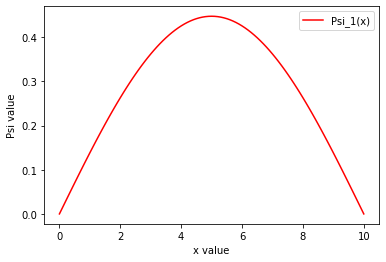

In [10]:
from matplotlib import pyplot as plt

plt.plot(x, psi_x, 'red',label='Psi_1(x)')
plt.xlabel("x value")
plt.ylabel("Psi value")
plt.legend()

''' create plot object by issuing the command plt.plot(x_data, y_data) w
    where x_data is the name of the array that contains your x-values and y_data is the name of
    the array that contains your y-values. '''


Evaluate (by hand)
\begin{equation}
\hat{H} \psi_1(x)
\end{equation}
where in atomic units,
\begin{equation}
\hat{H} = \frac{-1}{2} \frac{d^2}{dx^2}.
\end{equation}

You should obtain as a result $E_1 \psi_1(x)$.  Plot both 
$\psi_1(x)$ against $x$ and $E_1 \psi_1(x)$ against $x$.


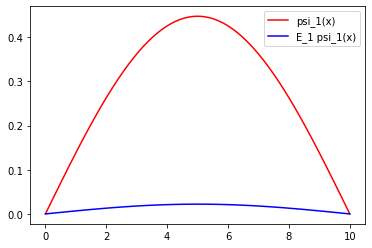

In [11]:
E1_psi_x = np.pi ** 2 / (2 * L ** 2) * psi_x
plt.plot(x, psi_x, 'red', label='psi_1(x)')
plt.plot(x, E1_psi_x, 'blue', label='E_1 psi_1(x)')
plt.legend()

Now imagine that an electric potential has been applied to your box, such that the Hamiltonian operator can now be written like:
\begin{equation}
\hat{H}_p = \frac{-1}{2} \frac{d^2}{dx^2} + \frac{1}{2} x.
\end{equation}
Evaluate $\hat{H}_p \psi_1(x)$ and plot the result against $x$ so that you can compare 
the plot to both $\psi_1(x)$ vs $x$ and $E_1 \psi_1(x)$ vs $x$.

Hint: Create a numpy array that models the electric potential
`Vx = 1/2. * x`
so that you can basically create an array called `Hp_on_psi` that is mathematically equal to 
\begin{equation}
\hat{H}_p \psi_1(x) = E_1 \psi_1(x) + \frac{1}{2}x \psi_1(x).
\end{equation}

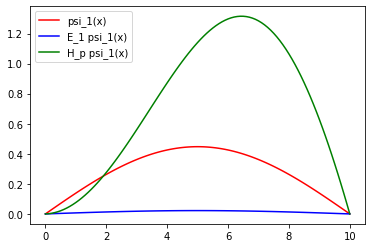

In [12]:
### this has a similar expression as before, but with one additional term from the potential!
Hp_psi_x = np.pi ** 2 / (2 * L ** 2) * psi_x + 0.5 * x * psi_x

### plot Hp_psi_x vs psi_x and E1_psi_x to see the difference!
plt.plot(x, psi_x, 'red', label='psi_1(x)')
plt.plot(x, E1_psi_x, 'blue', label='E_1 psi_1(x)')
plt.plot(x, Hp_psi_x, 'green', label='H_p psi_1(x)')
plt.legend()
plt.show()

You can see in the plot above that the shape of $\hat{H}_P \psi_1(x)$ is clearly different than $\psi_1(x)$, which means that $\psi_1(x)$ is not an eigenfunction of $\hat{H}_P$!

# Homework Questions!
- How does the total kinetic energy of a collection of $N$ particles grow with $N$ assuming each particle has the same average kinetic energy?  Compute the total kinetic energy for five different values of $N$ and plot the results using $pyplot$.

- How does the total potential energy of a collection of $N$ equally spaced charged particles grow with $N$?  Compute the the total potential energy for five different values of $N$ and plot the results.

- Use the $time$ library in python to determine how the time required to compute the kinetic and potential energy for the five different values of $N$; plot the time required vs $N$ and discuss if the kinetic seems to scale linearly and the potential seems to scale quadratically with $N$.

Answer/Strategy:  There are many ways to solve this, but probably the most convenient (i.e. least number of lines of code to be written) involves creating an array to hold 5 different values of $N$, and then looping over the values entries in that array, forming the corresponding $m$ and $v$ arrays and computing the total kinetic energy for each particle number, and saving the results for each particle number in its own array.  Once that is done, one can plot the array containing the 5 different particle numbers against the array containing the different total kinetic energy values.  One can infer from the plots, and reason from analysis of the computations themselves, that

a. The total kinetic energy scales linearly with the number of particles since each individual particle contributes to the total kinetic energy only through it's individual mass and velocity.  The time required to compute the total kinetic energy also scales linearly with the number of particles for the same reason: there will be $N_{part}$ distinct kinetic energy terms to compute and sum over in the computation of the total kinetic energy.

b. The total potential energy scales quadratically with the number of particles since each particle *pair* contributes to the total potential energy, and the number of unique particle pairs grows as $N_{part} (N_{part}-1)/2 \approx N_{part}^2$ in the limit of large $N_{part}$.  The time required to compute the total potential energy also scales 
quadratically with the number of particles for the same reason: there will be $N_{part} (N_{part}-1)/2$ distinct contributions to the potential energy to compute and sum over.


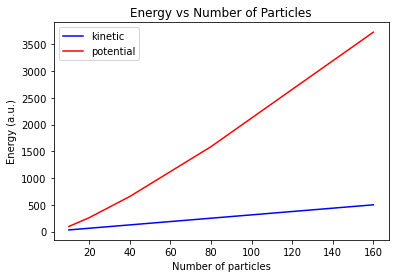

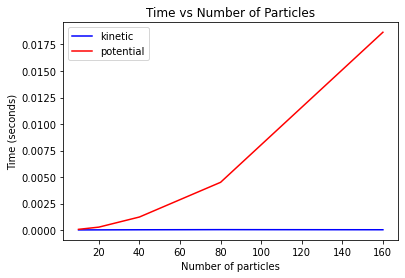

In [13]:

### Create an array with 5 different values of Npart
### I'll choose to double number of particle numbers in each entry
N_array = [10, 20, 40, 80, 160]
### Create an array with 5 different entries that will store the total kinetic
### energy for each number of Npart
Kin_array = np.zeros(len(N_array))
### Create an array with 5 different entries that will store the total potential
### energy for each number of Npart
Pot_array = np.zeros(len(N_array))
### create an array of the same length at N_array that will store
### the time taken to compute total kinetic energy for each number of particles
kin_time_array = np.zeros(len(N_array))
### create an array of the same length at N_array that will store
### the time taken to compute total potential energy for each number of particles
pot_time_array = np.zeros(len(N_array))
### Loop through elements of N_array... assign the appropriate
### arrays of particle masses, velocities, positions, charges, and separations
### in each case and then compute kinetic and potential energy, taking time in each case.
for i in range(0,len(N_array)):
    ### define all arrays for this number of particles
    m = np.ones(N_array[i])*1.0
    v = np.ones(N_array[i])*2.5
    q = np.ones(N_array[i])
    x = np.linspace(0,(N_array[i]-1)*0.2,N_array[i])
    ### need to compute separation values for r array
    r = np.zeros((N_array[i],N_array[i]))
    for j in range(0,len(m)):
        for k in range(0,len(m)):
            r[j][k] = np.sqrt( (x[j] - x[k])**2)
    ### now that m, v, q, and r are defined for  compute total kinetic energy,
    ### store the result to Kin_array, time how long it takes to compute
    ### the kinetic energy, and store the time in time_array
    ### kinetic energy first
    start_time = time.time()
    # create array of kinetic energy values for each particle!
    T = 0.5 * m * v ** 2
    # sum them all together 
    Kin_array[i] = np.sum(T)
    end_time = time.time()
    kin_time_array[i] = end_time - start_time
    ### potential energy second
    start_time = time.time()
    Pot_array[i] = Potential(r, q)
    end_time = time.time()
    pot_time_array[i] = end_time - start_time
plt.plot(N_array, Kin_array, 'blue', label='kinetic')
plt.plot(N_array, Pot_array, 'red', label='potential')
plt.xlabel("Number of particles")
plt.ylabel("Energy (a.u.)")
plt.title("Energy vs Number of Particles")
plt.legend()
plt.show()
plt.plot(N_array, kin_time_array, 'blue', label='kinetic')
plt.plot(N_array, pot_time_array, 'red', label='potential')
plt.ylabel("Time (seconds)")
plt.xlabel("Number of particles")
plt.title("Time vs Number of Particles")
plt.legend()
plt.show()
